# Data Processing

In [31]:
#!pip install Keras gensim pandas numpy nltk python-decouple scikit-learn scipy matplotlib pymorphy2
#!pip install -U pymorphy2-dicts-uk # dictionary for the Ukrainian language

## DOWNLOAD

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
#df = pd.read_csv('Covid-data-2020.csv', sep=',')
df = pd.read_csv('posts-2021.csv', sep=',')

In [3]:
dfu = df[df['lang'].isin(['uk'])]
dfu.head(5)

,id,created_time,timestamp,text,lang,tagged_user_text,tags,link,link_description,reaction_count,...,reaction_like_count,reaction_love_count,reaction_haha_count,reaction_wow_count,reaction_sad_count,reaction_angry_count,group_id,reaction_support_count,video_url,owner_wall_type
0,100554668284949,2020-04-05 10:00:12,1586080812,"Заходи (завдання), які виконані в зоні (районі...",uk,{},{covid19},NaN,NaN,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,100955405534603,2021-05-24 06:55:51,1621839351,Світова пандемія принесла невизначеність у сус...,uk,{},{},NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,page
6,102572828636390,2021-04-15 09:44:38,1618479878,За добу в Польщі померло понад 800 людей від к...,uk,{},"{covid19,новини}",NaN,NaN,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,page
7,102682578660679,2021-05-05 07:22:32,1620199352,"Мене часто питають, а як зробити інакше. Ось я...",uk,{},{},NaN,NaN,4.0,...,1.0,3.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,page
9,103293791915145,2021-04-27 15:18:27,1619536707,NaN,uk,{},{},NaN,"""В Україні реалізовують проект ПРОРОСІЙСЬКА УК...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,user


In [35]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 11885
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3458 non-null   int64  
 1   created_time                    3458 non-null   object 
 2   timestamp                       3458 non-null   int64  
 3   text                            2852 non-null   object 
 4   lang                            3458 non-null   object 
 5   tagged_user_text                3452 non-null   object 
 6   tags                            3458 non-null   object 
 7   link                            664 non-null    object 
 8   link_description                1379 non-null   object 
 9   reaction_count                  3458 non-null   float64
 10  comment_count                   3458 non-null   float64
 11  share_count                     3458 non-null   float64
 12  video_view_count                1

In [36]:
txt = dfu[['text']]
txt['like'] = dfu['reaction_like_count']
txt['love'] = dfu['reaction_love_count']
txt['haha'] = dfu['reaction_haha_count']
txt['wow'] = dfu['reaction_wow_count']
txt['sad'] = dfu['reaction_sad_count']
txt['angry'] = dfu['reaction_angry_count']
txt = txt.reset_index(drop=True)
txt.head(5)

<ipython-input-36-86cbdcd226dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt['like'] = dfu['reaction_like_count']
<ipython-input-36-86cbdcd226dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt['love'] = dfu['reaction_love_count']
<ipython-input-36-86cbdcd226dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,text,like,love,haha,wow,sad,angry
0,"Заходи (завдання), які виконані в зоні (районі...",2.0,0.0,0.0,0.0,0.0,0.0
1,Світова пандемія принесла невизначеність у сус...,0.0,0.0,0.0,0.0,0.0,0.0
2,За добу в Польщі померло понад 800 людей від к...,1.0,0.0,0.0,0.0,0.0,0.0
3,"Мене часто питають, а як зробити інакше. Ось я...",1.0,3.0,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    2852 non-null   object 
 1   like    3458 non-null   float64
 2   love    3458 non-null   float64
 3   haha    3458 non-null   float64
 4   wow     3458 non-null   float64
 5   sad     3458 non-null   float64
 6   angry   3458 non-null   float64
dtypes: float64(6), object(1)
memory usage: 189.2+ KB


In [38]:
txt.dropna(inplace=True)

# CORPUS

## NLTK (Natural Language Toolkit)

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

Note:

    word_tokenize - extract words from the text;
    sent_tokenize - extract sentences from the text.



In [39]:
txt.text[0]

'Заходи (завдання), які виконані в зоні (районі) пандемії, панзоотії та епіфітотії УКРАЇНА: Президент України Володимир Зеленський: під час пандемії COVID-19  країни повинні підтримувати одна одну. «Під час пандемії #COVID19 світ має єднатися, країни повинні підтримувати одна одну. Сьогодні 20 найкращих українських лікарів прибули до Італії, щоб допомогти з лікуванням пацієнтів. Вони привезуть додому неоціненний досвід», - написав у Twitter Президент України Володимир Зеленський. Володимир Зеленський: наполягаю, щоб лікарям і медичним закладам була приділена особлива увага. На традиційній селекторній нараді щодо боротьби з поширенням коронавірусу Президенту України Володимиру Зеленському доповіли про перевірки лікарень щодо їхнього стану, забезпечення фінансуванням, спецзасобами захисту, а також щодо наявності медичних працівників. Головний санітарний лікар Віктор Ляшко поінформував про ситуацію на Тернопільщині, куди він поїхав за дорученням Глави держави. Там виникли проблеми з найбі

In [40]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer

def word_sent_tokenize(sent):
    return word_tokenize(sent), sent_tokenize(sent)

def regex_tokenizer(sent):
    return RegexpTokenizer(r'\w+').tokenize(sent)

words, sents = word_sent_tokenize(txt.text[0])
print("\tTest-Words:\n", words, "\n\n\tTest-Sentences:\n", sents)

	Test-Words:
 ['Заходи', '(', 'завдання', ')', ',', 'які', 'виконані', 'в', 'зоні', '(', 'районі', ')', 'пандемії', ',', 'панзоотії', 'та', 'епіфітотії', 'УКРАЇНА', ':', 'Президент', 'України', 'Володимир', 'Зеленський', ':', 'під', 'час', 'пандемії', 'COVID-19', 'країни', 'повинні', 'підтримувати', 'одна', 'одну', '.', '«', 'Під', 'час', 'пандемії', '#', 'COVID19', 'світ', 'має', 'єднатися', ',', 'країни', 'повинні', 'підтримувати', 'одна', 'одну', '.', 'Сьогодні', '20', 'найкращих', 'українських', 'лікарів', 'прибули', 'до', 'Італії', ',', 'щоб', 'допомогти', 'з', 'лікуванням', 'пацієнтів', '.', 'Вони', 'привезуть', 'додому', 'неоціненний', 'досвід', '»', ',', '-', 'написав', 'у', 'Twitter', 'Президент', 'України', 'Володимир', 'Зеленський', '.', 'Володимир', 'Зеленський', ':', 'наполягаю', ',', 'щоб', 'лікарям', 'і', 'медичним', 'закладам', 'була', 'приділена', 'особлива', 'увага', '.', 'На', 'традиційній', 'селекторній', 'нараді', 'щодо', 'боротьби', 'з', 'поширенням', 'коронавірус

## StopWords

### StopWords Elimination

Since there is no support for the Ukrainian language in the NLTC library, we will take a different path. The most complete list of Ukrainian stop words was found here: https://github.com/stopwords-iso/stopwords-uk. To remove unnecessary words, we write our own little method stopwords_elimination, but first we will load our stopwords as a set:


In [41]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

STOP_WORDS = list(get_stop_words('ukrainian'))

stopwords_ua = pd.read_csv('stopwords_ua.txt', header=None, names=['stopwords']).values
stopwords_ua = [i[0] for i in stopwords_ua]

stopwords_ua_73 = pd.read_csv('stopwords_ua-73.txt', header=None, names=['stopwords']).values
stopwords_ua_73 = [i[0] for i in stopwords_ua_73]

stopwords_ua_1983 = pd.read_csv('stopwords_ua-1983.txt', header=None, names=['stopwords']).values
stopwords_ua_1983 = [i[0] for i in stopwords_ua_1983]

stopwords_Lu = pd.read_csv('stopwords_Lutsenko.txt', header=None, names=['stopwords']).values
stopwords_Lu = [i[0] for i in stopwords_Lu]

STOP_WORDS.extend(stopwords_ua)
STOP_WORDS.extend(stopwords_ua_73)
STOP_WORDS.extend(stopwords_ua_1983)
STOP_WORDS.extend(stopwords_Lu)

print('We used', len(set(STOP_WORDS)), 'stop words')
STOP_WORDS = list(set(STOP_WORDS))

We used 8272 stop words


In [42]:
def stopwords_elimination(stop_words, sent):
    return [w for w in sent if w not in stop_words]

filtered_words = stopwords_elimination(STOP_WORDS, words)
print("\n\n==================== WORDS from Test-Words ====================\n", words,
      "\n\n================== FILTERED from Test-Words ==================\n", filtered_words)



==================== WORDS from Test-Words ====================
 ['Заходи', '(', 'завдання', ')', ',', 'які', 'виконані', 'в', 'зоні', '(', 'районі', ')', 'пандемії', ',', 'панзоотії', 'та', 'епіфітотії', 'УКРАЇНА', ':', 'Президент', 'України', 'Володимир', 'Зеленський', ':', 'під', 'час', 'пандемії', 'COVID-19', 'країни', 'повинні', 'підтримувати', 'одна', 'одну', '.', '«', 'Під', 'час', 'пандемії', '#', 'COVID19', 'світ', 'має', 'єднатися', ',', 'країни', 'повинні', 'підтримувати', 'одна', 'одну', '.', 'Сьогодні', '20', 'найкращих', 'українських', 'лікарів', 'прибули', 'до', 'Італії', ',', 'щоб', 'допомогти', 'з', 'лікуванням', 'пацієнтів', '.', 'Вони', 'привезуть', 'додому', 'неоціненний', 'досвід', '»', ',', '-', 'написав', 'у', 'Twitter', 'Президент', 'України', 'Володимир', 'Зеленський', '.', 'Володимир', 'Зеленський', ':', 'наполягаю', ',', 'щоб', 'лікарям', 'і', 'медичним', 'закладам', 'була', 'приділена', 'особлива', 'увага', '.', 'На', 'традиційній', 'селекторній', 'нараді'

### StopWords WordCloud Visualization

Next, let's visualize using the WordCloud library. Also add a little style and make a special mask. So that we can add our own mask for WordCloud, we need to write a method that will allow us to do this, but before that we import the necessary libraries:

In [43]:
#!pip install opencv-python wordcloud

In [44]:
import cv2
import matplotlib.pyplot as plt

from urllib.request import urlopen
from wordcloud import WordCloud, ImageColorGenerator

Now, we load simple mask as numpy array:

In [45]:
def load_mask(mask_url):
    with urlopen(mask_url) as response:
        mask = np.asarray(bytearray(response.read()), dtype="uint8")
        mask = cv2.imdecode(mask, cv2.IMREAD_COLOR)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        
    return mask

Load and show our mask:

In [46]:
# load mask
stop_mask = load_mask("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Liberian_Road_Signs_-_Regulatory_Sign_-_Stop.svg/400px-Liberian_Road_Signs_-_Regulatory_Sign_-_Stop.svg.png")

Then we create and show default wordcloud. In particular, we can color the wordcloud using ImageColorGenerator's image-based coloring technique. It uses the average color of the region occupied by the word in a source image:

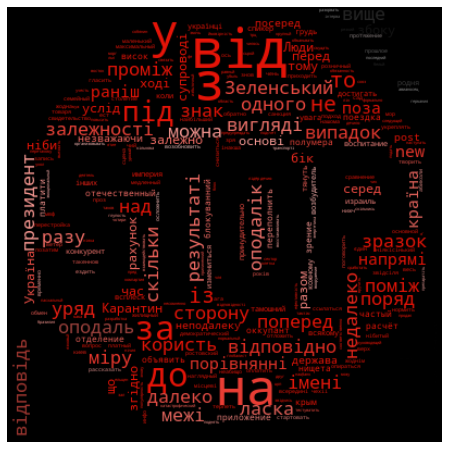

In [47]:
from wordcloud import WordCloud, ImageColorGenerator

# create wordcloud
wordcloud = WordCloud(
    background_color="black",
    mask=stop_mask,
    random_state=42,
    max_font_size=50,
    max_words=700,
)

wordcloud.generate(' '.join(STOP_WORDS))

image_colors = ImageColorGenerator(stop_mask)

# show wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## Lemmatizing

<cite><b>Lemmatization</b>, unlike <b>Stemming</b>, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called <b>Lemma</b>. A lemma is the canonical form, dictionary form, or citation form of a set of words.</cite>

At lematization the word loses inflectional endings and finds the basic form. For example, the noun `[плечима — плече]`, the verb `[ходили — ходити]`, the adjective `[смішним — смішний]`.

Python `NLTK` provides `WordNet Lemmatizer` that uses the `WordNet Database` to lookup lemmas of words. But there is no Ukrainian, after some searching I found that in `pymorphy2` there is support for Ukrainian, actually, at the experimental level (at the time of writing - March 2021), but there is.

To install the library, type in the terminal: `pip install pymorphy2` and  `pip install -U pymorphy2-dicts-uk`

Let's connect the library and see how it works:

In [48]:
#!pip install pymorphy2
#!pip install -U pymorphy2-dicts-uk

In [49]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer(lang='uk')
morph.parse('відчувається')

[Parse(word='відчувається', tag=OpencorporaTag('VERB,Refl,impf sing,3per,pres'), normal_form='відчуватися', score=1.0, methods_stack=((DictionaryAnalyzer(), 'відчувається', 281, 12),))]

Now let's try the lematizer on our test:

In [50]:
def lemmatize_words(morph, words):
    return [morph.parse(word)[0].normal_form for word in words]

lemmatized_words = lemmatize_words(morph, filtered_words)
print(lemmatized_words)

['захід', '(', 'завдання', ')', ',', 'виконаний', 'зон', '(', 'район', ')', ',', 'панзоотія', 'епіфітотія', 'україна', ':', 'україна', 'володимир', ':', 'covid-19', 'країна', 'підтримувати', '.', '«', 'під', '#', 'covid19', 'єднатися', ',', 'країна', 'підтримувати', '.', 'сьогодні', '20', 'найкращий', 'український', 'лікарів', 'прибути', 'італія', ',', 'допомогти', 'лікування', 'пацієнт', '.', 'вони', 'привезти', 'додому', 'неоціненний', '»', ',', '-', 'написати', 'twitter', 'україна', 'володимир', '.', 'володимир', ':', 'наполягати', ',', 'лікар', 'медичний', 'заклад', 'приділений', 'особливий', '.', 'на', 'традиційний', 'селекторний', 'нарада', 'поширення', 'коронавірус', 'президент', 'україна', 'володимир', 'зеленський', 'доповісти', 'перевірка', 'стан', ',', 'забезпечення', 'фінансування', ',', 'спецзасіб', 'захист', ',', 'медичний', 'працівник', '.', 'головний', 'лікар', 'віктор', 'ляшко', 'поінформувати', 'ситуація', 'тернопільщина', ',', 'поїхати', 'доручення', 'глава', 'держава

## Processing the data

Now let's start processing all data using the methods described above. Lematization is quite a time-consuming procedure, so one has to wait:

In [51]:
# Use regex_tokenizer to get rid of punctuation
words_list = [regex_tokenizer(item) for item in list(txt['text'])]
print("Review without punctuation: ", words_list[1])

# Eliminate stopwords
words_list = [stopwords_elimination(STOP_WORDS, word) for word in words_list]
print("\n\nPosts after stopwords elimination: ", words_list[1])

# Lemmatizing
words_list = [lemmatize_words(morph, word) for word in words_list]
print("\n\nPosts after lemmatizing: ", words_list[1])

Review without punctuation:  ['Світова', 'пандемія', 'принесла', 'невизначеність', 'у', 'суспільство', 'Держава', 'вимушена', 'реагувати', 'надшвидко', 'не', 'маючи', 'права', 'на', 'помилку', 'Бізнес', 'винаходить', 'нові', 'моделі', 'соціальної', 'відповідальності', 'Благодійні', 'організації', 'адаптуються', 'під', 'кризові', 'умови', 'пропонуючи', 'нові', 'підходи', 'рішення', 'та', 'проєкти', '20', 'травня', 'директорка', 'dobro', 'ua', 'Irina', 'Gutsal', 'виступить', 'на', 'Віртуальному', 'Саміті', 'Благодійництва', 'на', 'тему', 'Фандрайзинг', '2021', 'специфіка', 'ковідного', 'часу', 'та', 'долучиться', 'до', 'дискусійої', 'секції', 'Благодійники', 'і', 'бізнес', 'адаптивність', 'під', 'час', 'кризи', 'Запрошуємо', 'усіх', 'прийняти', 'участь', 'у', 'Саміті', 'Участь', 'безкоштовна', 'реєстрація', 'за', 'посиланням', 'https', 'hopin', 'com', 'events', 'vcs']


Posts after stopwords elimination:  ['Світова', 'пандемія', 'принесла', 'невизначеність', 'вимушена', 'реагувати', 'над

## Irrelevent Words Elimination

We will delete all words with Latin letters, words with a length of less than 3 and numbers. I don't know why, but for one cycle, it doesn't delete all superfluous words therefore it was necessary to put for this purpose a `while` cycle.

In [76]:
from re import match 

stop_list = ['україна','коронавірус','карантин','держава','зеленський','люди','уряд','президент','країна']

def irr_words_elim(words):
    while True:
        ready = True
        
        for word in words:
            if bool(match(r"[a-zA-Z]", word)) or word.isdigit() or len(word) <= 3 or word in stop_list:
                ready = False
                words.remove(word)
        
        if ready: break
        
    return words

Now actually delete all irrelevant words:

In [77]:
for i in words_list: 
    irr_words_elim(i)

## Vocabulary

In [78]:
from nltk import FreqDist
all_words = np.concatenate(words_list)
all_words_freq = FreqDist(all_words)

print("Most popular words: ", all_words_freq.most_common(100))
print("\nTotal number of unique words: ", len(all_words_freq.keys()))

Most popular words:  [('тест', 1004), ('допомога', 961), ('вакцина', 909), ('здоров', 882), ('питання', 877), ('робот', 850), ('вірус', 810), ('міністр', 803), ('захід', 786), ('обмеження', 783), ('травень', 773), ('українець', 759), ('український', 692), ('випадок', 678), ('маска', 673), ('закон', 671), ('ситуація', 661), ('вакцинація', 659), ('влад', 629), ('перший', 611), ('державний', 610), ('пандемія', 598), ('бізнес', 587), ('хворий', 576), ('охорона', 565), ('рішення', 564), ('зробити', 561), ('населення', 537), ('якщо', 514), ('перти', 494), ('система', 492), ('працівник', 491), ('умова', 486), ('медичний', 485), ('хотіти', 482), ('місце', 482), ('великий', 477), ('новий', 476), ('результат', 468), ('право', 467), ('кордон', 464), ('епідемія', 455), ('людина', 450), ('хвороба', 447), ('знати', 446), ('підтримка', 441), ('діти', 428), ('весь', 427), ('бюджет', 418), ('робити', 405), ('володимир', 399), ('мати', 392), ('заявити', 391), ('слово', 387), ('працювати', 380), ('головн

### Visualization of the most used words after processing

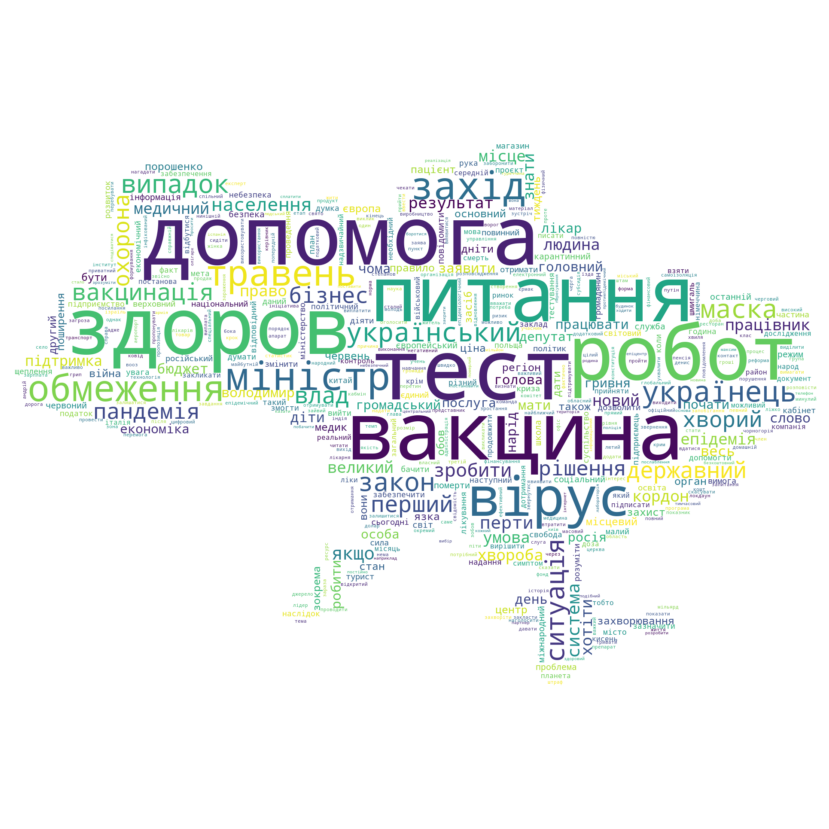

<Figure size 432x288 with 0 Axes>

In [79]:
mask = load_mask("https://i.imgur.com/UVe6Nas.png")

wordcloud = WordCloud(
    background_color="white", 
    mask=mask,
    max_words=500,
    random_state=42,
)

wordcloud.generate_from_frequencies(all_words_freq)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud21-sql.png")
plt.savefig("wordcloud-21"+".png", bbox_inches='tight')

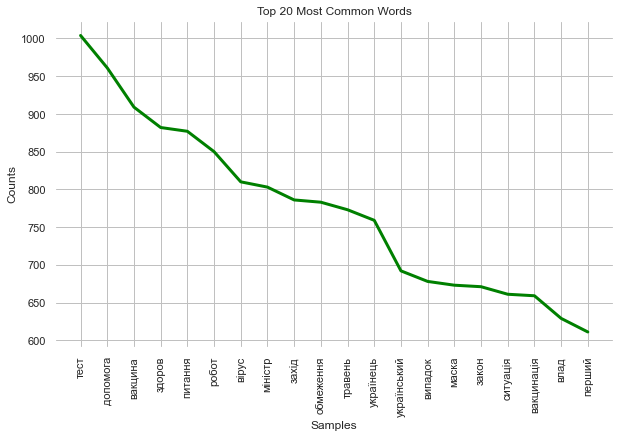

<AxesSubplot:title={'center':'Top 20 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [80]:
import seaborn as sns

%matplotlib inline
sns.set()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('xkcd:white')

all_words_freq.plot(20, color="green", title="Top 20 Most Common Words", linewidth=3)

# Pickle

In [81]:
corpus = [' '.join(post) for post in words_list]

In [82]:
import pickle

obj = {'corpus': corpus, 'words_list': words_list, 'all_words': all_words, 'txt': txt,'stop_words': STOP_WORDS}
output = open('my_corpus-21-sql.pql', 'wb')
pickle.dump(obj, output, 2)
output.close()